In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import *
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.pipeline import *
from sklearn.preprocessing import StandardScaler

In [22]:
X,y = load_iris(return_X_y=True)
X = X[:,:2]
features = load_iris().feature_names
targets = load_iris().target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

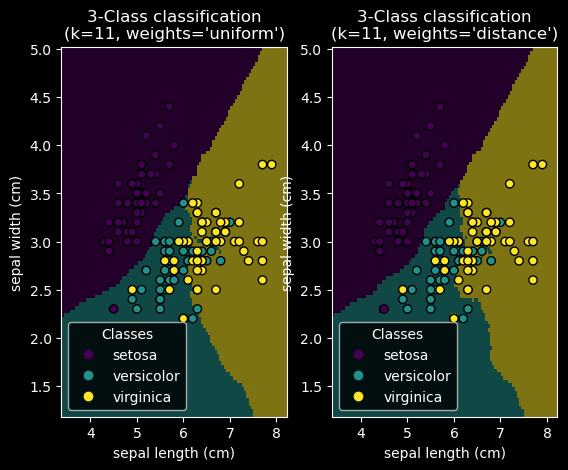

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
_, axs = plt.subplots(ncols=2)

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=features[0],
        ylabel=features[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        targets,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

<h1> Regression </h1>

In [20]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_random_state

# Load the faces datasets
X,y = fetch_olivetti_faces(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
n_pixels = X.shape[1]
n_faces = X.shape[0]

# # Upper half of the faces
# y_train = X_train[:, n_pixels // 2 :]
# X_train = X_train[:, : (n_pixels + 1) // 2]
# # Lower half of the faces
# y_test = X_test[:, n_pixels // 2 :]
# X_test = y_test[:, : (n_pixels + 1) // 2]

In [22]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

In [28]:
from sklearn.metrics import r2_score
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# higher better fit for r2_score
for i, (name, y_pred) in enumerate(y_test_predict.items()):
    print(f"{name}: {r2_score(y_pred, y_test)}")

Extra trees: 0.2089805921516238
K-nn: 0.4113970810981864
Linear regression: 0.24794212107024582
Ridge: 0.11208163471260613


In [29]:
# you can have a seperate test which seperates the training and testing data by
# higher and lower pixels and see how well it performs on getting the correct lower_face(y_pred)